<a href="https://colab.research.google.com/github/samhithaPeddireddy/Samhitha_Info5502_Spring2022/blob/main/lab_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The tenth Lab-assignment (04/28/2022, 50 points in total)

The purpose of this assignment is to practice normal distribution and annotation quality evaluation.

### Question 1 (25 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab10-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [1]:
# your code here

!pip install krippendorff


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab10-dataset.csv")
data.head()

,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN


In [4]:
le = LabelEncoder()
le.fit(data['Annotation1'])

data['le_Annotation1'] = le.transform(data['Annotation1'])
data['le_Annotation2'] = le.transform(data['Annotation2'])
data['le_Annotation3'] = le.transform(data['Annotation3'])
data['Annotation1'].value_counts()

Theory proposal\n                                   1323
Algorithms/ Methods Construction or Optimization     579
Model Construction or Optimization                   555
Performance Evaluation                               474
Resources                                            245
Applications                                         119
Dataset creation                                     102
 "Theory proposal\n"                                   1
Name: Annotation1, dtype: int64

In [5]:
from sklearn.metrics import cohen_kappa_score

score1 = cohen_kappa_score(list(data['le_Annotation1'].values), list(data['le_Annotation2'].values))
score2 = cohen_kappa_score(list(data['le_Annotation2'].values), list(data['le_Annotation3'].values))
score3 = cohen_kappa_score(list(data['le_Annotation1'].values), list(data['le_Annotation3'].values))

avg_kappa_score = (score1 + score2 + score3)/3
print("Cohen's kappa score is:", round(avg_kappa_score, 2))

if avg_kappa_score < 0.0:
    print("Less than chance agreement")

elif ((avg_kappa_score >= 0.01) & (avg_kappa_score <= 0.20)):
    print("Slight agreement")

elif ((avg_kappa_score >= 0.21) and (avg_kappa_score <= 0.40)):
    print("Fair agreement")

elif ((avg_kappa_score >= 0.41) and (avg_kappa_score <= 0.60)):
    print("Moderate agreement")

elif ((avg_kappa_score >= 0.61) and (avg_kappa_score <= 0.80)):
    print("Substantial agreement")

elif ((avg_kappa_score >= 0.81) and (avg_kappa_score <= 0.99)):
    print("Almost perfect agreement")

Cohen's kappa score is: 0.54
Moderate agreement


In [6]:
import krippendorff
data1 = [list(data['le_Annotation1'].values),
        list(data['le_Annotation2'].values),
        list(data['le_Annotation3'].values)]

fleiss_score = krippendorff.alpha(data1)
print("Fleiss kappa score is:", round(fleiss_score, 2))

Fleiss kappa score is: 0.57


### Question 2 (25 points) 

Normal distribution is the default probability for many real world scenarios. It represents a symmetric distribution where most of the observations cluster around the central peak called as mean of the distribution. A normal distribution can be thought of as a bell curve or Gaussian Distribution which typically has two parameters: mean and standard deviation (SD). The parameter used to measure the variability of observations around the mean is called as standard deviation. The probabilities for values occurring near mean are higher than the values far away from the mean. The parameters of the normal distribution plot defining the shape and the probabilities are mean and standard deviation. The area of the plot between two different points in the normal distribution plot represents the probability of the value occurring between those two points.

Please generate the nromal distribution for the following cases suing Python:

(1) IQ scores (the mean is typically 100, SD = 15)

(2) Marks of students in a class (mean = 60, SD = 20)

(3) Measure of weight (mean = 80 kg, SD = 10)

(4) Measure of blood pressure (mean = 120/80, SD = 20)

(5) Measure of wealth (measurement in money; mean = $50,000 , SD = $100)

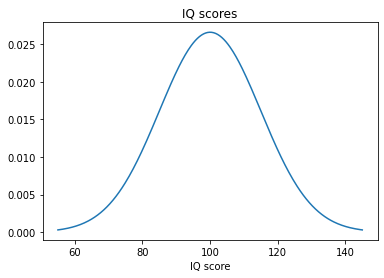

In [8]:
# your code here
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

mean = 100
std_dev = 15
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 300)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev))
plt.title("IQ scores")
plt.xlabel("IQ score")
plt.show()


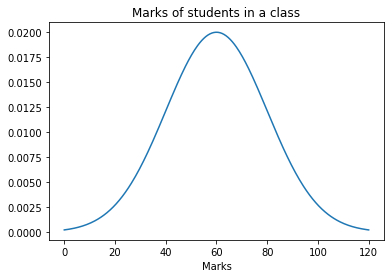

In [9]:
#2
mean = 60
std_dev = 20
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 300)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev))
plt.title("Marks of students in a class")
plt.xlabel("Marks")
plt.show()

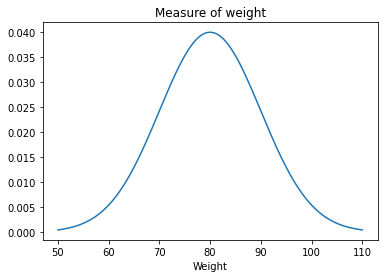

In [10]:
#3
mean = 80
std_dev = 10
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 300)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev))
plt.title("Measure of weight")
plt.xlabel("Weight")
plt.show()

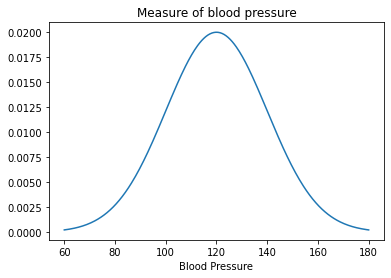

In [11]:
#4
mean = 120
std_dev = 20
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 300)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev))
plt.title("Measure of blood pressure")
plt.xlabel("Blood Pressure")
plt.show()

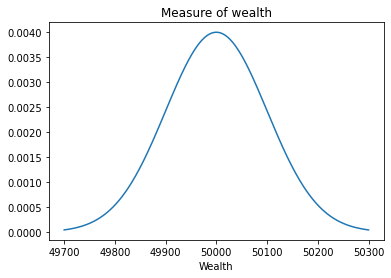

In [12]:
#5
mean = 50000
std_dev = 100
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 300)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev))
plt.title("Measure of wealth")
plt.xlabel("Wealth")
plt.show()